In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") # 불필요한 Warning 메시지를 꺼줍니다.

%matplotlib inline

In [15]:
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [17]:
df['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [19]:
df['Unit price'].describe() 

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64

In [21]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


<Axes: >

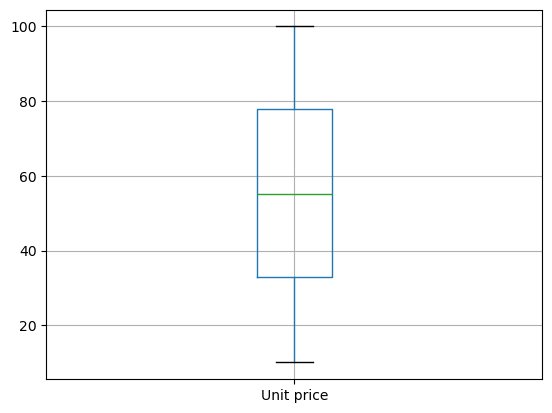

In [23]:
df.boxplot(column='Unit price')

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

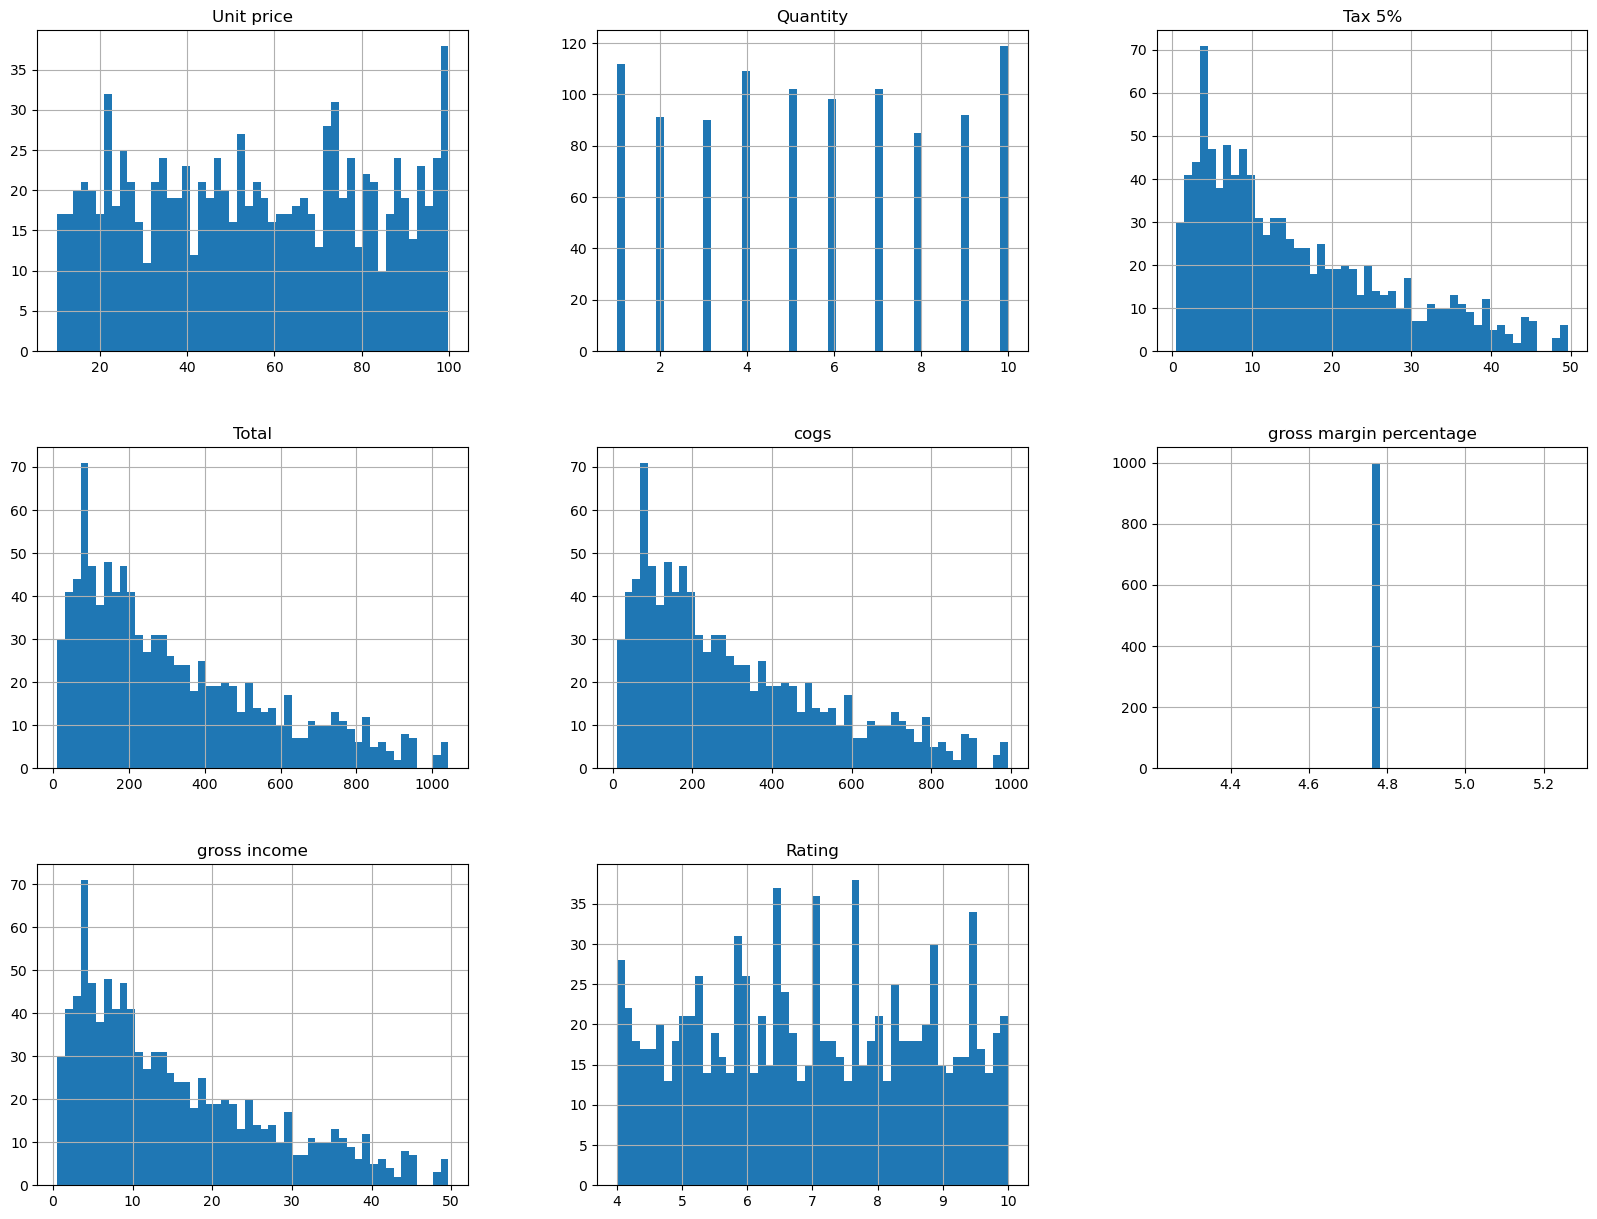

In [25]:
df.hist(bins=50, figsize=(20,15))

<Axes: >

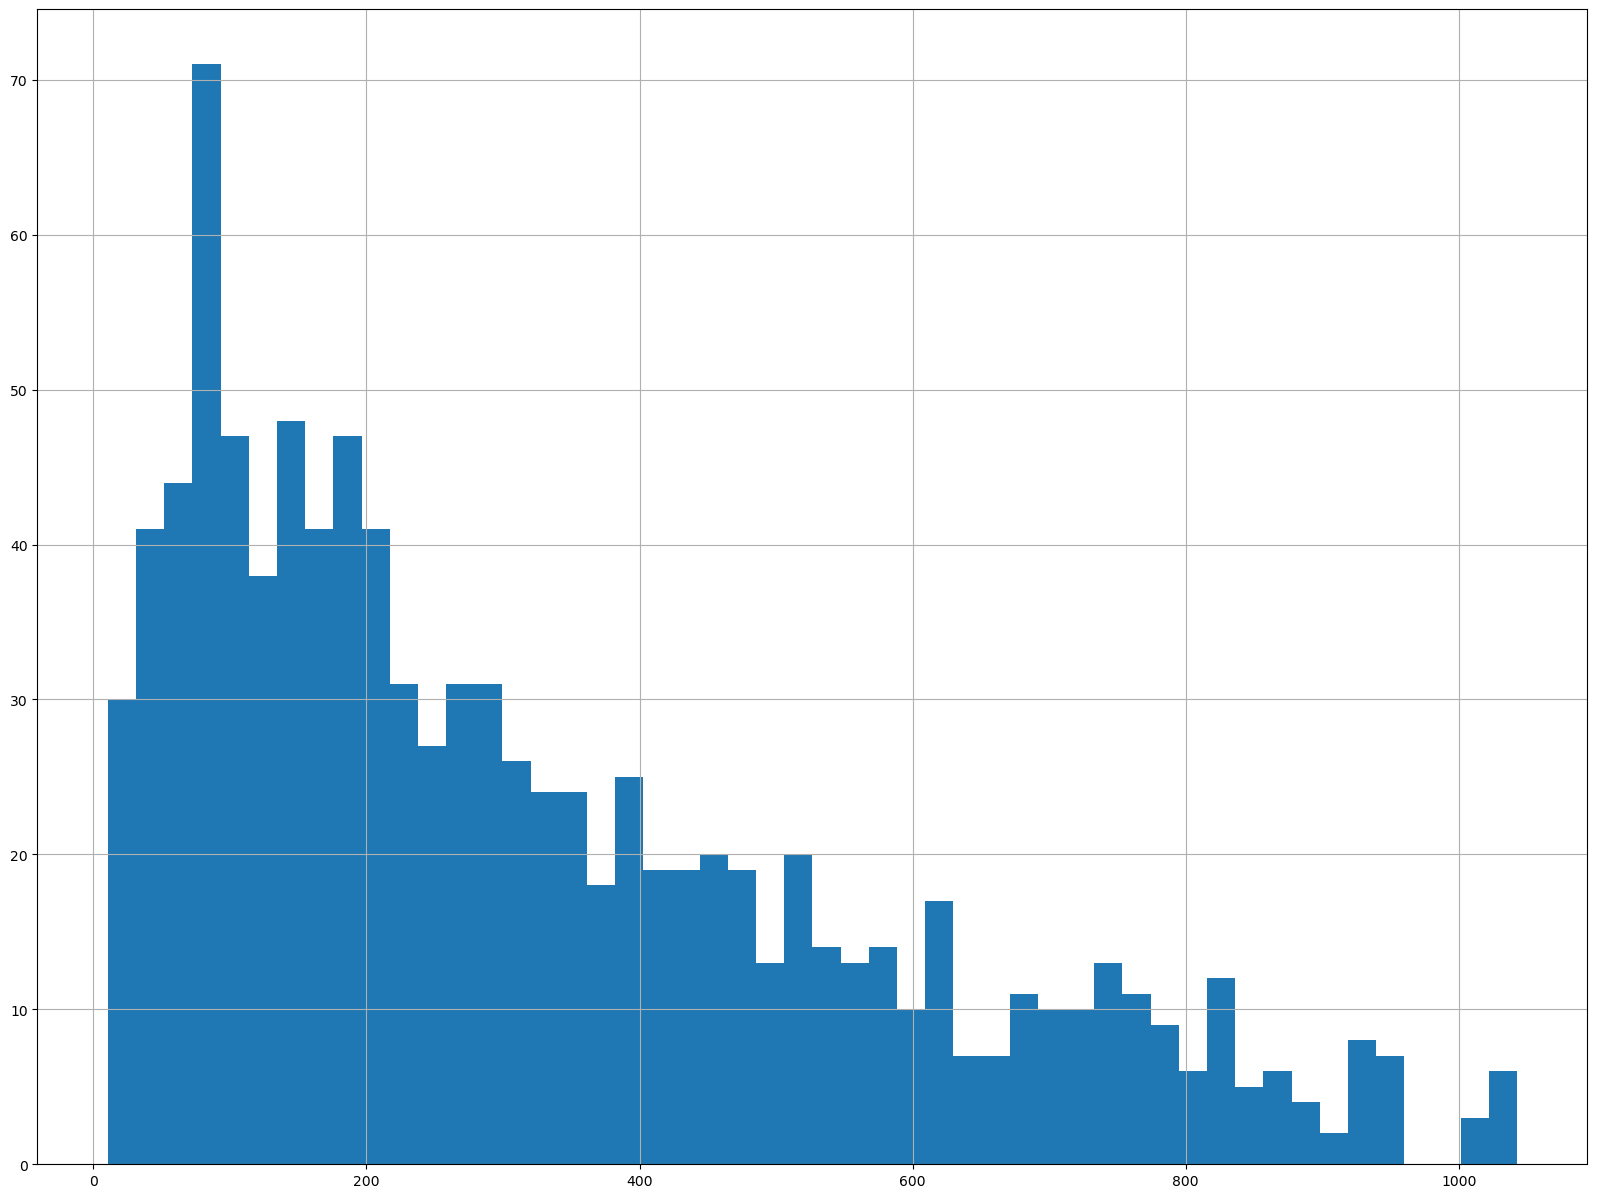

In [29]:
df_total=df['Total'] # 1회 평균 구매 비용
df_total.hist(bins=50, figsize=(20,15))

<Axes: >

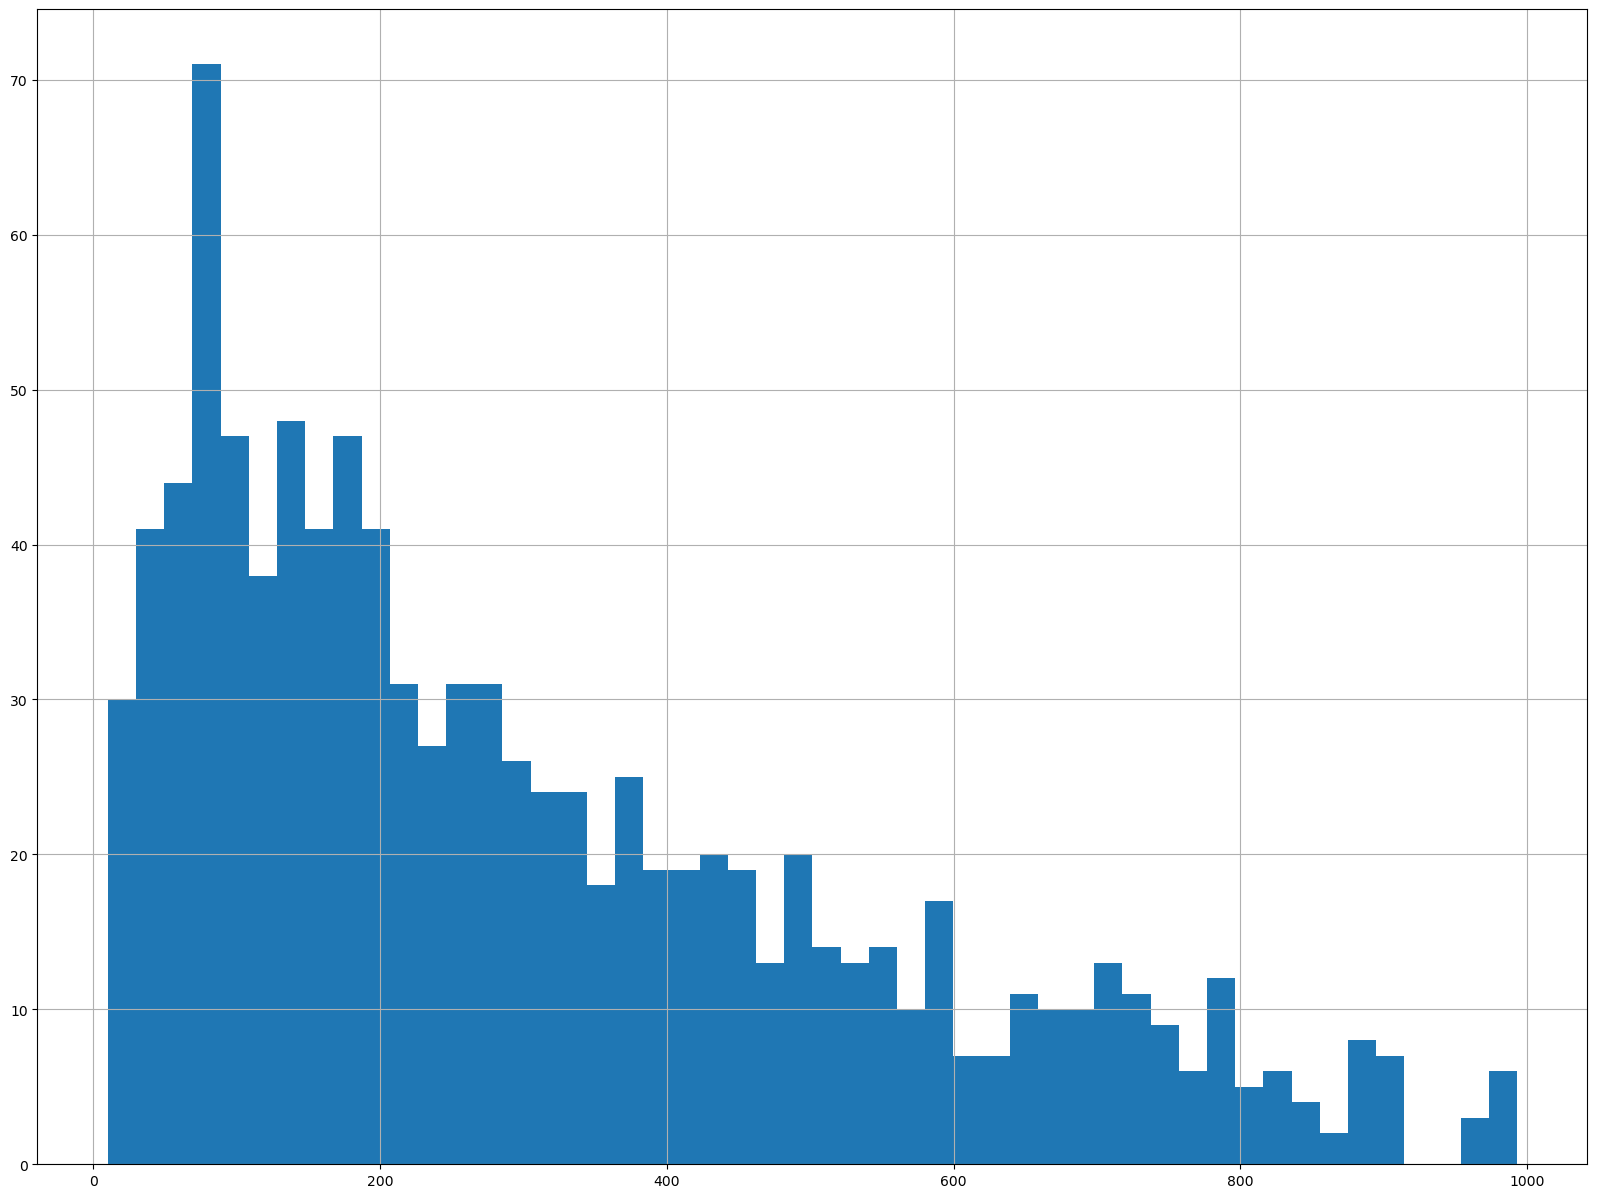

In [31]:
df_cogs=df['cogs'] # 1회 평균 구매 비용
df_cogs.hist(bins=50, figsize=(20,15))

<Axes: xlabel='Total', ylabel='Density'>

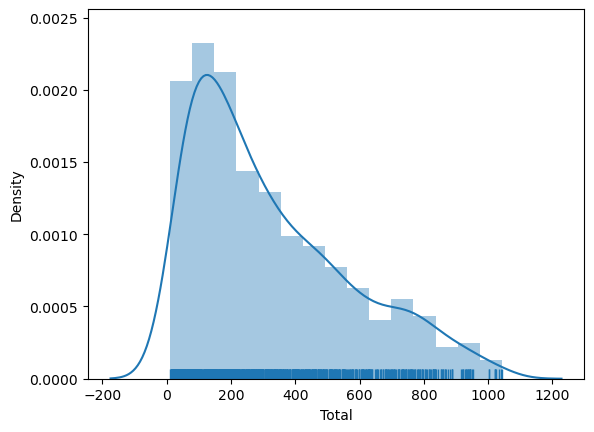

In [41]:
import seaborn as sns

sns.distplot(df_total, rug=True)

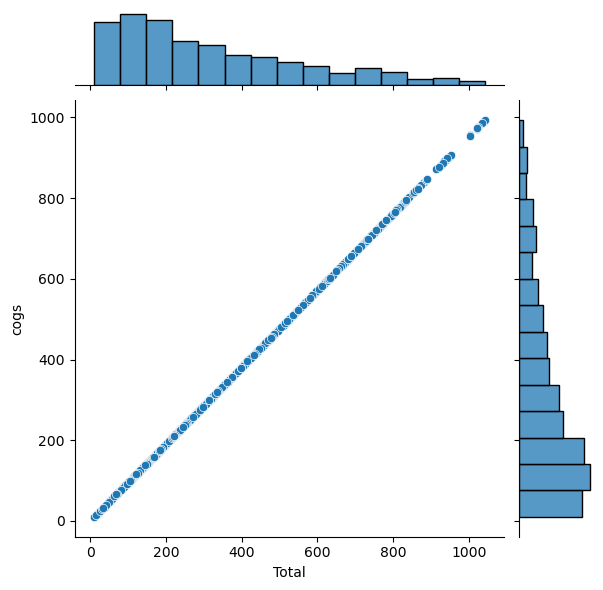

In [39]:
sns.jointplot(x="Total", y="cogs", data=df)

<Axes: >

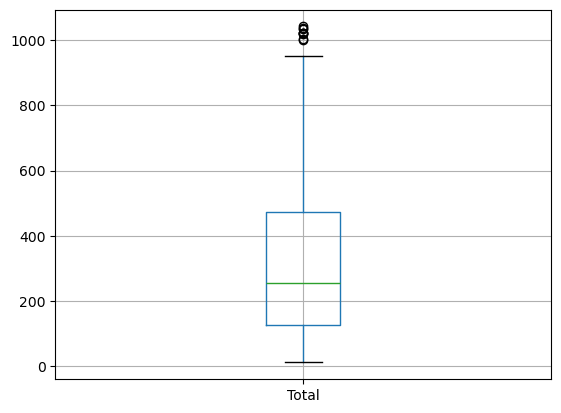

In [45]:
df.boxplot(column='Total')

array([[<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>]], dtype=object)

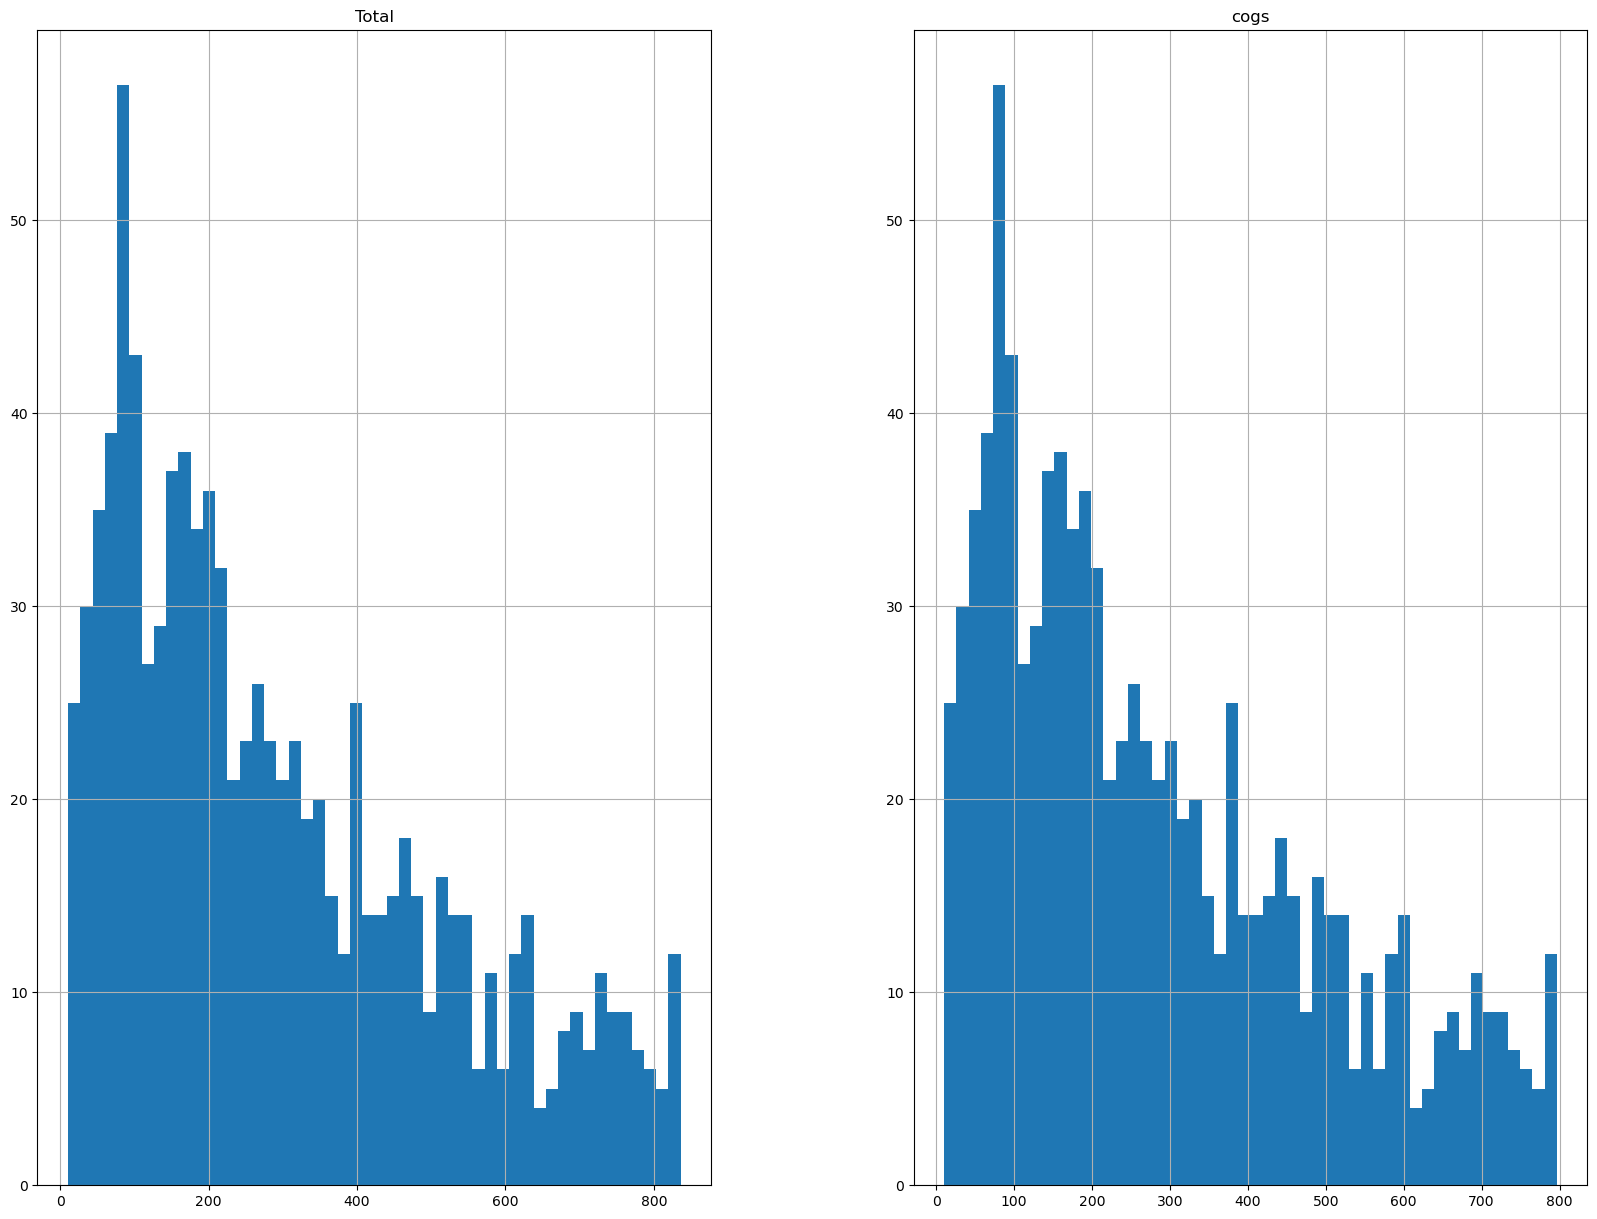

In [49]:
processed_df = df[['Total', 'cogs']]
processed_df = processed_df[ (processed_df['Total'] < 900) & (processed_df['cogs'] < 800) ] # 상한선에 해당하는 값

processed_df.hist(bins=50, figsize=(20,15))

array([[<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>]], dtype=object)

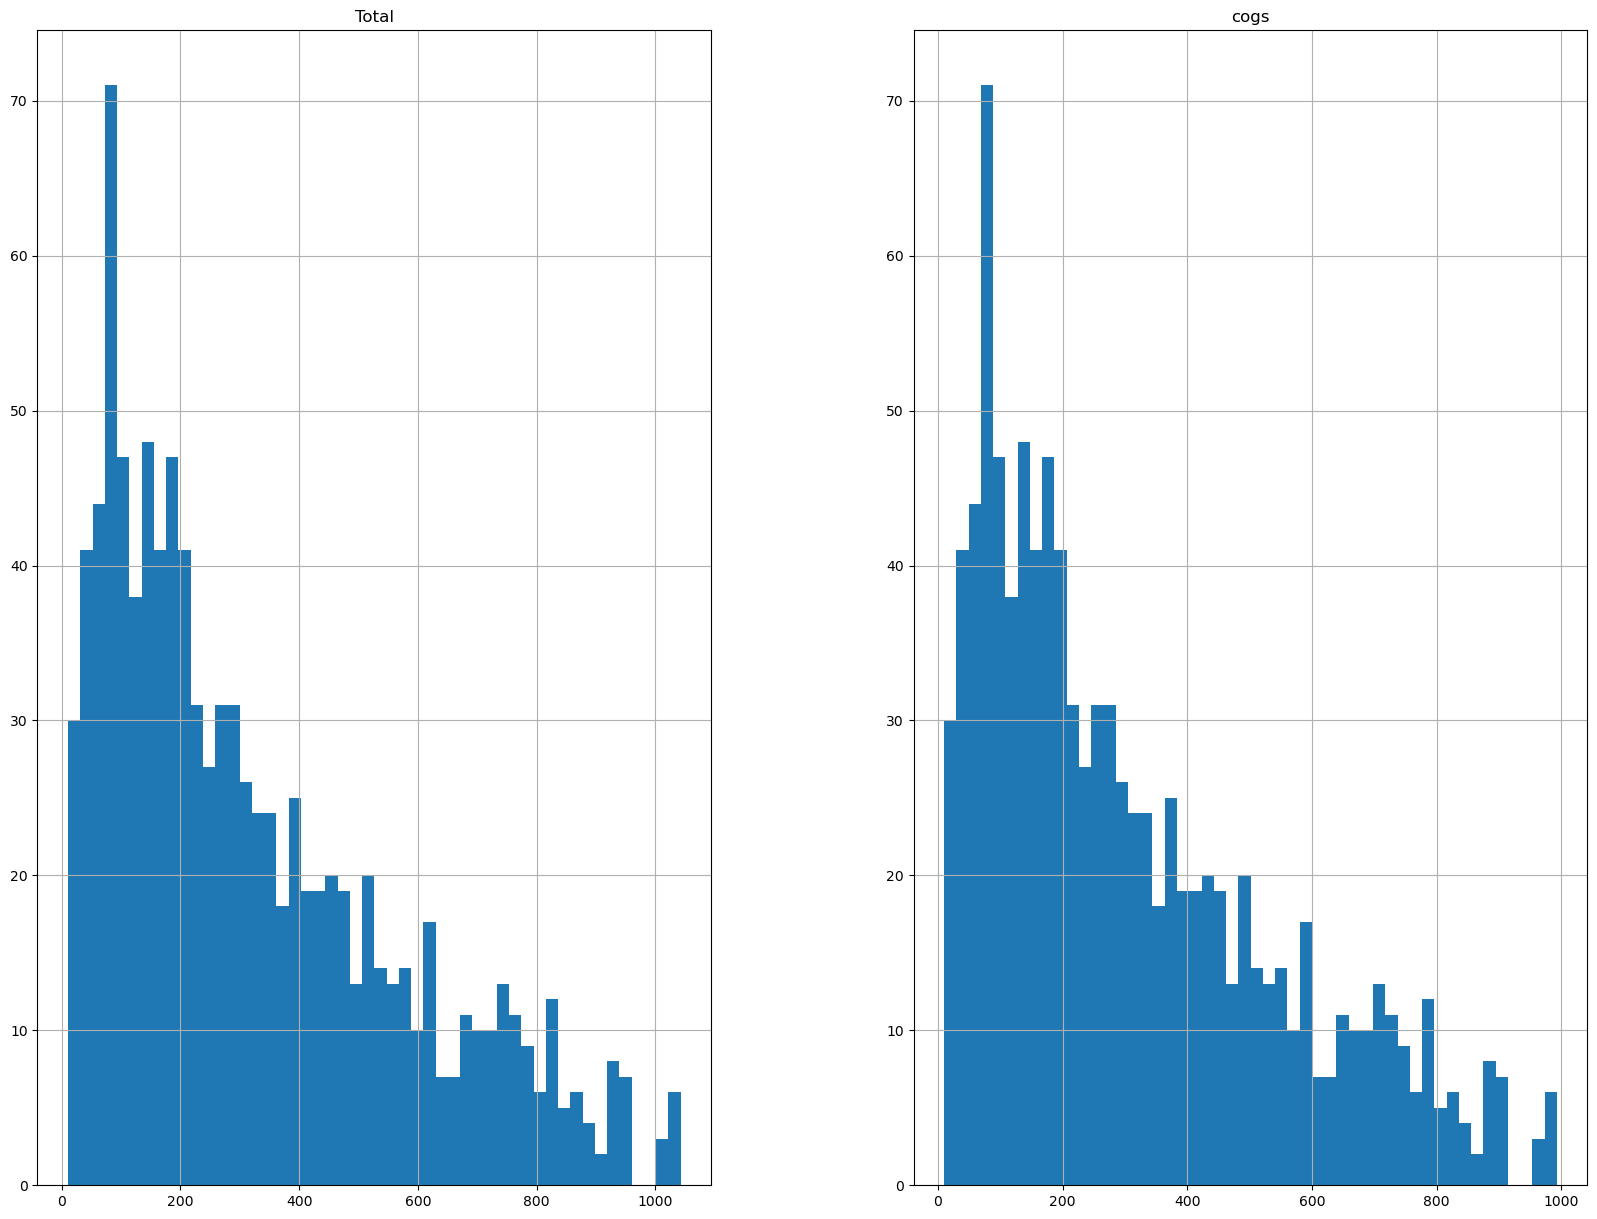

In [51]:
df[['Total', 'cogs']].hist(bins=50, figsize=(20,15))

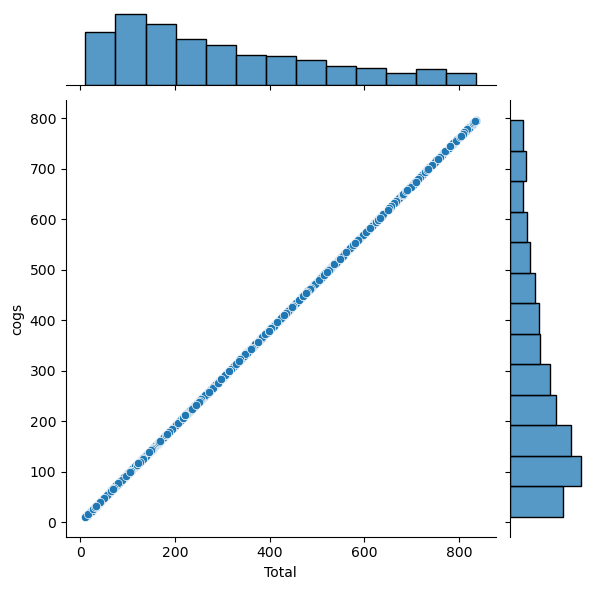

In [53]:
sns.jointplot(x="Total", y="cogs", data=processed_df)

In [57]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [67]:
pd.crosstab(['Product line'], ['Payment'], margins=True)

col_0,Payment,All
row_0,,
Product line,1,1
All,1,1


In [69]:
print(df.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [71]:
print(df['Product line'].isnull().sum())
print(df['Payment'].isnull().sum())

0
0


In [73]:
print(df[['Product line', 'Payment']].dropna().head())

             Product line      Payment
0       Health and beauty      Ewallet
1  Electronic accessories         Cash
2      Home and lifestyle  Credit card
3       Health and beauty      Ewallet
4       Sports and travel      Ewallet


In [81]:
cross_tab = pd.crosstab(df['Product line'], df['Payment'], margins=True)
cross_tab

Payment,Cash,Credit card,Ewallet,All
Product line,,,,
Electronic accessories,71,46,53,170
Fashion accessories,57,56,65,178
Food and beverages,57,61,56,174
Health and beauty,49,50,53,152
Home and lifestyle,51,45,64,160
Sports and travel,59,53,54,166
All,344,311,345,1000


In [79]:
pd.crosstab(df['Product line'], df['Payment'], margins=True, normalize=True)

Payment,Cash,Credit card,Ewallet,All
Product line,,,,
Electronic accessories,0.071,0.046,0.053,0.170
Fashion accessories,0.057,0.056,0.065,0.178
Food and beverages,0.057,0.061,0.056,0.174
Health and beauty,0.049,0.050,0.053,0.152
Home and lifestyle,0.051,0.045,0.064,0.160
Sports and travel,0.059,0.053,0.054,0.166
All,0.344,0.311,0.345,1.000


In [91]:
import scipy as sp
from scipy import stats

stats.chisquare(df['Product line'], df['Payment'])

ValueError: could not convert string to float: 'Health and beauty'

In [89]:
import pandas as pd
from scipy import stats

# 교차표 생성
cross_tab = pd.crosstab(df['Product line'], df['Payment'])

# 카이제곱 검정 수행
chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross_tab)

print("Chi2 Stat:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(ex)
# 보통 p-value 값이 0.05보다 작으면 귀무가설이 기가되나 0.5587284263994265로 큰 수치가 나왔으므로 Product line과 Payment는 통계적으로 유의미한 관계가 없다고 판명된다.

Chi2 Stat: 8.721438270223713
P-Value: 0.5587284263994265
Degrees of Freedom: 10
Expected Frequencies Table:
[[58.48  52.87  58.65 ]
 [61.232 55.358 61.41 ]
 [59.856 54.114 60.03 ]
 [52.288 47.272 52.44 ]
 [55.04  49.76  55.2  ]
 [57.104 51.626 57.27 ]]


<Axes: xlabel='Product line'>

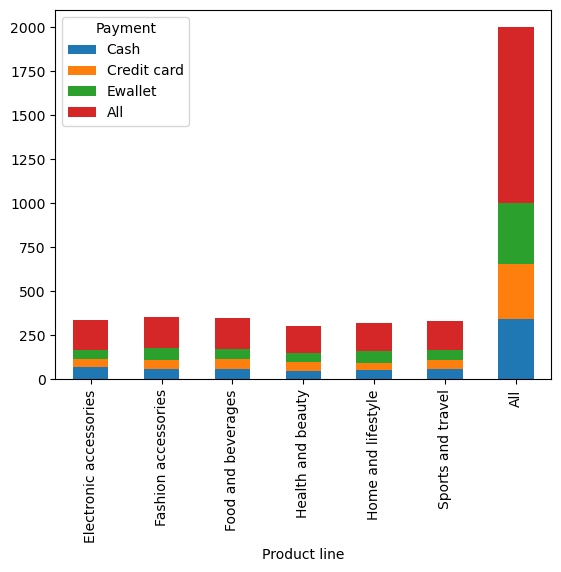

In [95]:
ct = pd.crosstab(df['Product line'], df['Payment'], margins=True)

ct.plot.bar(stacked=True)

<Axes: xlabel='Product line'>

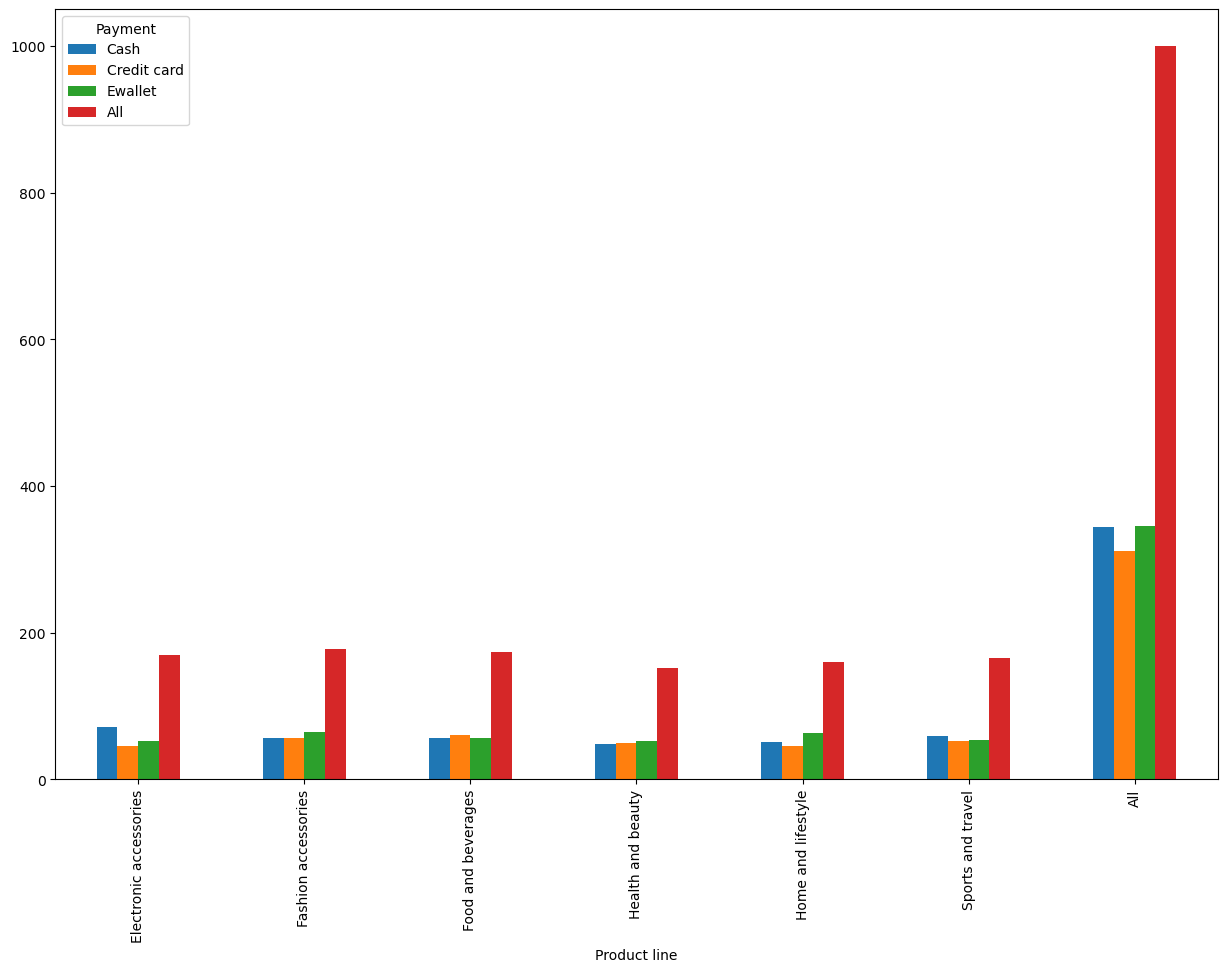

In [97]:
ct.plot.bar(stacked=False, figsize=(15, 10))

In [99]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [109]:
df_corr = df[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income','Rating']]
df_corr.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


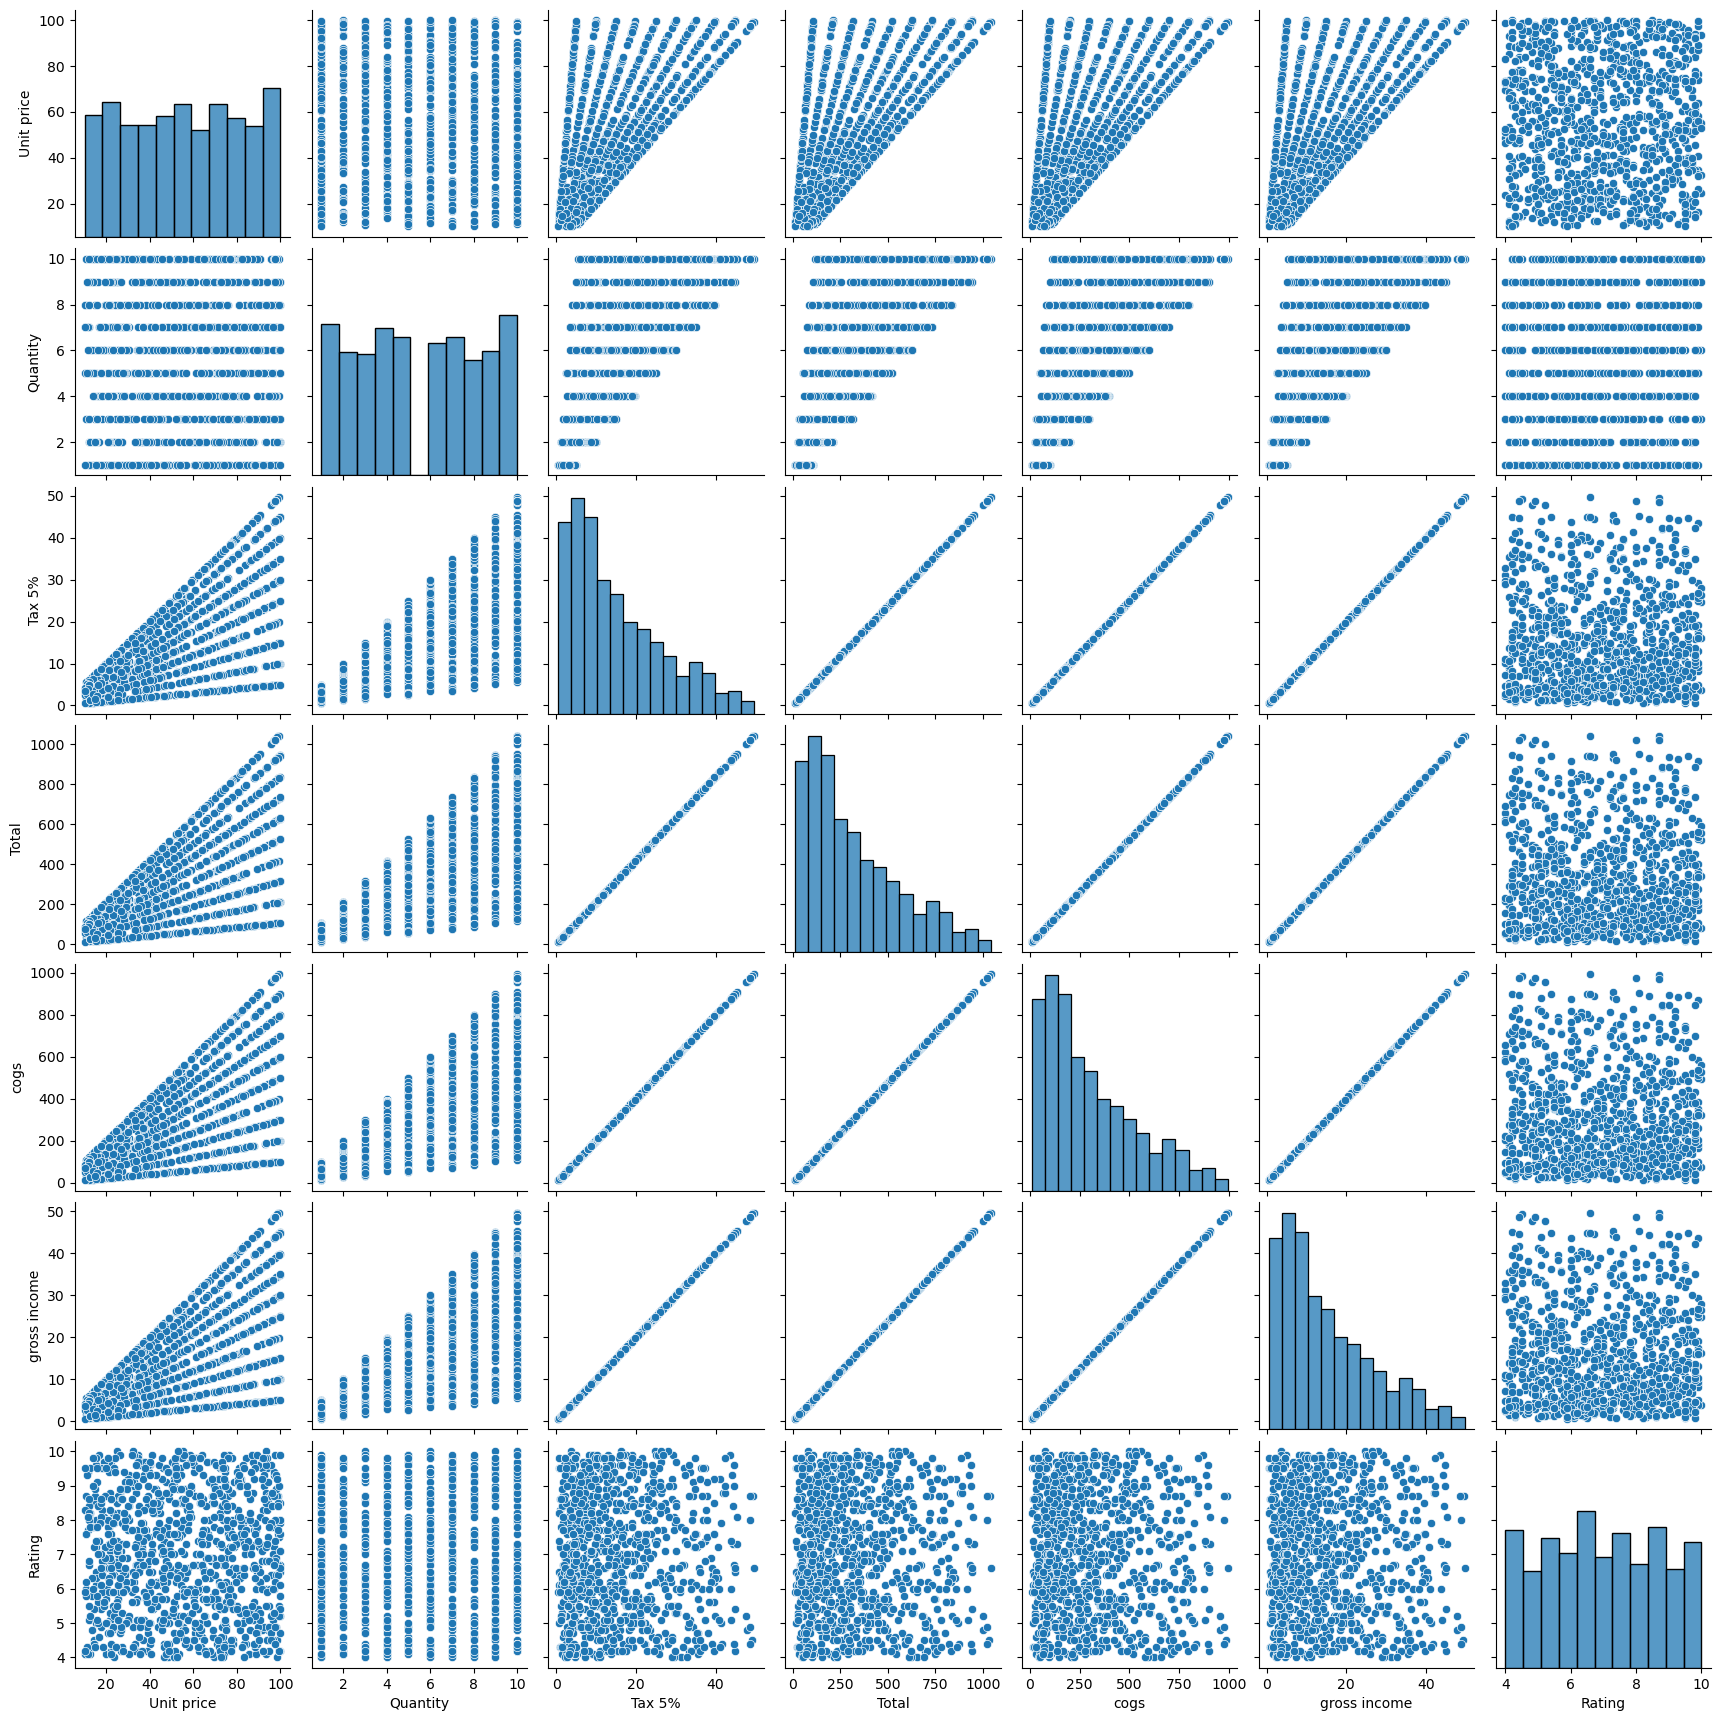

In [111]:
sns.pairplot(df_corr)